# Medical Examiner Case Archives

Cook County (Chicago) medical examiner records, taken from [here](https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86) after discovery via [Data is Plural](https://tinyletter.com/data-is-plural).

## Do your importing/setup

In [2]:
import pandas as pd
%matplotlib inline

## Read in the data, check its row count and column types

In [3]:
df = pd.read_csv("case-archive-encoded.csv", na_values = -1)
df.head()

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,0.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,1.0,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"


In [4]:
df.shape

(22634, 20)

In [5]:
df.dtypes

Case_Number              object
Date_of_Incident         object
Date_of_Death            object
Age                     float64
Gender                  float64
Race                    float64
Latino                     bool
Manner_of_Death          object
Primary_Cause            object
Primary_Cause_Line_B     object
Primary_Cause_Line_C     object
Secondary_Cause          object
Gun_Related              object
Opioid_Related           object
Incident_Address         object
Incident_City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
dtype: object

## Cleaning up your data

First you'll want to convert the `Race` and `Gender` columns from codes into actual text to make analysis easier.

### Gender codes

* `-1` - `Data missing`
* `0` - `Female`
* `1` - `Male`
* `2` - `Unknown`

### Race codes

* `-1` - `Data missing`
* `0` - `American Indian`
* `1` - `Asian`
* `2` - `Black`
* `3` - `Other`
* `4` - `Unknown`
* `5` - `White`

In [6]:
df.Gender.replace({
    0 : "Female",
    1 : "Male",
    2 : "Unknown"
}, inplace = True)

df.Gender.value_counts()

Male       16158
Female      6363
Unknown       12
Name: Gender, dtype: int64

In [7]:
df.Race.replace({
    0 : "American Indian",
    1 : "Asian",
    2 : "Black",
    3 : "Other",
    4 : "Unknown",
    5 : "White"
}, inplace = True)

df.Race.value_counts()

White              12490
Black               9366
Asian                342
Other                269
Unknown               28
American Indian       15
Name: Race, dtype: int64

## What percent of the dataset is men, and what percent is women?

It should display as **Male** and **Female**, not as numbers.

In [8]:
df[df.Gender != "Unknown"].Gender.value_counts(normalize = True)*100

Male      71.74637
Female    28.25363
Name: Gender, dtype: float64

## Getting rid of "Data missing"

`Unknown` means that officially the gender or race is unknown, while `Data missing` means the record is incomplete. That means "Data missing" should have been `NaN`!

Go back to your `read_csv` many cells before and make it so that "Data missing" is automatically set as `NaN`.

- *Tip: Do not use `.replace` for this one!*
- *Tip: Look at the options for `read_csv`, there's something that lets you specify missing values*
- *Tip: It isn't `"Data missing"` - think about how you already replaced*
- *Tip: Be sure you're using an array when you tell it what the 'missing' options are*

### After you've done this, re-run all of the the previous cells and confirm that `"Data missing"` does not exist any more

## What is the most common race in the dataset? We want percentages.

We'll come back to this later, I'm just having you check the column for now.

In [9]:
df.Race.value_counts(normalize = True)*100

White              55.486450
Black              41.608174
Asian               1.519325
Other               1.195024
Unknown             0.124389
American Indian     0.066637
Name: Race, dtype: float64

## Do a `.value_counts()` on the `Opioid Related` column

In [10]:
df.Opioid_Related.value_counts()

True    3378
Name: Opioid_Related, dtype: int64

## That's weird. Did everyone die from opioids? Try again, but including missing data.

In [11]:
import numpy as np
df.Opioid_Related.value_counts(dropna = False)

NaN     19256
True     3378
Name: Opioid_Related, dtype: int64

## Cleaning up True/False columns

For some reason in this dataset, the True/False columns are either `True` or `NaN`. `NaN` causes a lot of problems, I'd rather have it be false.

You can use [`fillna`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html) to fill in empty data - it's like `.replace` but for `NaN`.

### Replace all `NaN` values with `False` for the "Gun Related" and "Opioid Related" columns.

In [12]:
df.Opioid_Related.fillna(value = False, inplace = True)

### Do another value counts on Opioid Related to make sure it has both True and False values

In [13]:
df.Opioid_Related.value_counts()

False    19256
True      3378
Name: Opioid_Related, dtype: int64

# Back to analysis!

## What's the average age people were when they died?

In [14]:
df.Age.median()

53.0

## Let's look at how the oldest people died

We're just going to browse. Read through how the **oldest 30 people died.**

In [15]:
df.Age.sort_values(ascending = False).head(30)

17602    106.0
21142    106.0
12106    105.0
8653     103.0
9376     103.0
4942     103.0
9904     101.0
5621     101.0
14697    101.0
8656     101.0
13498    101.0
11558    101.0
4015     100.0
7898     100.0
5817     100.0
8780     100.0
14044    100.0
17142    100.0
10335    100.0
798      100.0
3985     100.0
4239     100.0
13696    100.0
9859     100.0
17789    100.0
2610     100.0
13113     99.0
914       99.0
9357      99.0
16286     99.0
Name: Age, dtype: float64

## Seems like a lot of problems with fractures

### What's the median age of someone dying from a cause that involves a fracture?

Are fractures especially dangerous for the elderly?

- *Tip: Filter for a cause that involves a fracture, then take the median age*
- *Tip: If you get a "cannot index NA values" error, the problem is it's trying to search `NaN` values and doesn't know what to do with them. You need to tell pandas to count `NaN` as false by setting another option - it isn't `NaN=False`, but it's close!*

In [16]:
fractures = df[(df.Primary_Cause.str.contains("fracture", case = False, na = False))
            |(df.Primary_Cause_Line_B.str.contains("fracture", case = False, na = False))
            | (df.Primary_Cause_Line_C.str.contains("fracture", case = False, na = False))]

fractures.Age.median()

86.0

### To get a "compared to what?", what's the median age of _anyone_ dying an accidental death?

In [17]:
df[df.Manner_of_Death == "ACCIDENT"].Age.median()

51.0

### What's the median age of each manner of death?

It looks like different kinds of death might happen to different ages of people. Let's investigate that further.

In [18]:
df.groupby("Manner_of_Death").Age.median()

Manner_of_Death
ACCIDENT        51.0
HOMICIDE        26.0
NATURAL         61.0
PENDING         47.0
SUICIDE         45.0
UNDETERMINED    21.0
Name: Age, dtype: float64

### Who is the oldest homicide victim?

It looks like homicide is for young people, so maybe we'll find an interesting outlier?

In [19]:
df[df.Manner_of_Death == "HOMICIDE"].Age.sort_values(ascending = False).head(1)

3702    98.0
Name: Age, dtype: float64

In [20]:
df[(df.Manner_of_Death == "HOMICIDE") & (df.Age == 98)]

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,NaN,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"


## Investigating toxicity-related homicides

She was old, and was purposefully overdosed on morphine and hydrocodone. Might have been euthenasia? Let's find similar cases.

### Find every homicide where the primary cause of death is some sort of toxicity

Toxicity can just overdose. You should have **ten rows**.

- *Tip: If you're doing this as one statement, make sure you use your parentheses correctly. If you leave them out, you'll have zero rows*
- *Tip: You could make a homicides-only dataframe if you wanted to*

In [21]:
df[(df.Manner_of_Death == "HOMICIDE") & ((df.Primary_Cause.str.contains("toxicity", case = False, na = False))
            |(df.Primary_Cause_Line_B.str.contains("toxicity", case = False, na = False))
            | (df.Primary_Cause_Line_C.str.contains("toxicity", case = False, na = False)))]

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,NaN,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"
5395,ME2015-02286,05/27/2015 03:15:00 PM,06/03/2015 07:25:00 PM,28.0,Female,White,False,HOMICIDE,"COMPLICATIONS OF AMITRIPTYLINE AND METABOLITE,...",NaN,NaN,NaN,NaN,False,1102 S. Springinsguth Rd. #1D,SCHAUMBURG,-88.119741,42.005376,60663,"(42.005376, -88.1197414)"
6144,ME2015-03058,07/18/2015 07:00:00 AM,07/19/2015 02:05:00 AM,10.0,Male,Black,False,HOMICIDE,CARBON MONOXIDE TOXICITY,INCENDIARY HOUSE FIRE,NaN,NaN,NaN,False,8327 S. DREXEL,CHICAGO,-87.602328,41.743167,68218,"(41.7431675, -87.6023283)"
6764,ME2015-03692,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,28.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,NaN,NaN,False,5209 S Lorel Avenue,CHICAGO,-87.755913,41.798035,72663,"(41.7980351, -87.7559129)"
6765,ME2015-03693,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,63.0,Male,Other,False,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,"ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE, ACUTE...",NaN,False,5205 S. Lorel,CHICAGO,-87.756075,41.798102,73036,"(41.7981017, -87.7560751)"
7612,ME2015-04564,10/22/2015 10:39:00 AM,10/22/2015 11:05:00 AM,31.0,Male,Other,False,HOMICIDE,HEROIN AND ETHANOL TOXICITY,NaN,NaN,NaN,NaN,True,5240 NORTH SHERIDAN APT 417,CHICAGO,-87.655620,41.977582,74058,"(41.977582, -87.6556196)"
12656,ME2016-04092,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,4.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,NaN,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68043,"(41.7477108, -87.5642452)"
12657,ME2016-04093,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,7.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,NaN,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68054,"(41.7477108, -87.5642452)"
12660,ME2016-04096,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,56.0,Male,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,NaN,False,8114 S. Essex Avenue,CHICAGO,-87.564246,41.747673,67699,"(41.7476732, -87.5642456)"
13050,ME2016-04490,09/16/2016 02:45:00 AM,09/16/2016 03:34:00 AM,59.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,GARAGE FIRE,NaN,NaN,NaN,False,2151 W 21st Street,CHICAGO,-87.680361,41.853700,65250,"(41.8536999, -87.6803607)"


### Okay, nope, we were wrong.

Those were almost **all from fires**. Apparently homicide is not the best place to go looking for toxicity. What's the most popular manner of death for primary causes involving toxicity?

- *Tip: Remember that `['colname']` is the same as `.colname`. You can't do `.col with spaces` so you'll need to do `['col with spaces']` a lot in this dataset
- *Tip: Or I guess if you really wanted to, you could rename your columns to have spaces in them (IF YOU DO THIS DON'T DO IT IN EXCEL BECAUSE IT WILL PROBABLY BREAK YOUR CSV.)*

In [22]:
toxic = df[(df.Primary_Cause.str.contains("toxicity", case = False, na = False))
            |(df.Primary_Cause_Line_B.str.contains("toxicity", case = False, na = False))
            | (df.Primary_Cause_Line_C.str.contains("toxicity", case = False, na = False))]

toxic.Manner_of_Death.value_counts()

ACCIDENT        3244
SUICIDE          222
UNDETERMINED      42
HOMICIDE          10
NATURAL            1
Name: Manner_of_Death, dtype: int64

### Okay, toxicity deaths (overdoses) are mostly accidents. Let's look at the first 30 accidental deaths involving toxicity.

- *Tip: Remember your parentheses!*

In [23]:
toxic[df.Manner_of_Death == "ACCIDENT"].head(30)

C:\Users\Weihua\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,NaN,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
45,ME2018-00910,02/19/2018 08:00:00 PM,02/19/2018 08:22:00 PM,56.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND HEROIN) TOXICITY,NaN,NaN,NaN,NaN,True,7724 SOUTH LOOMIS BLVD #1,CHICAGO,-87.658932,41.753282,69589,"(41.7532818, -87.6589318)"
51,ME2018-00400,01/20/2018 11:15:00 AM,01/20/2018 11:57:00 AM,19.0,Male,White,False,ACCIDENT,HEROIN TOXICITY,NaN,NaN,NaN,NaN,True,"5719 S. Kimbark, Apt. 3",CHICAGO,-87.594142,41.790743,77880,"(41.7907435, -87.5941419)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,NaN,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,NaN,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
65,ME2018-01129,03/03/2018 03:45:00 AM,03/03/2018 04:31:00 AM,34.0,Male,Black,False,ACCIDENT,ACUTE ETHANOL TOXICITY,NaN,NaN,NaN,NaN,False,7899 SOUTH SHORE,CHICAGO,-87.548113,41.752056,68080,"(41.7520559, -87.5481134)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,NaN,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,Male,Asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,NaN,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,Male,White,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,NaN,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,Female,White,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZ...",NaN,NaN,NaN,NaN,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN


## Wow, that's a lot of drug overdoses. What's more popular for overdosing: heroin, fentanyl, cocaine, or ethanol?

You can count something like "COMBINED ETHANOL, NORDIAZEPAM, AND FENTANYL TOXICITY" under both ethanol and fentanyl.

- *Tip: Search for them individually*

In [24]:
toxic_a = toxic[df.Manner_of_Death == "ACCIDENT"]

C:\Users\Weihua\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
toxic_heroin = toxic_a[toxic_a.Primary_Cause.str.contains("heroin", case = False, na = False)]
toxic_heroin.shape

(1755, 20)

In [26]:
toxic_fentanyl = toxic_a[toxic_a.Primary_Cause.str.contains("fentanyl", case = False, na = False)]
toxic_fentanyl.shape

(1339, 20)

In [27]:
toxic_cocaine = toxic_a[toxic_a.Primary_Cause.str.contains("cocaine", case = False, na = False)]
toxic_cocaine.shape

(912, 20)

In [28]:
toxic_ethanol = toxic_a[toxic_a.Primary_Cause.str.contains("ethanol", case = False, na = False)]
toxic_ethanol.shape

#The most popular one is heroin

(800, 20)

# Cleaning up Primary Cause

Let's stop investigating for a second and maybe clean up this "Primary Cause" column.

## What are the most common Primary Cause of death? Include `NaN` values

- *Tip: There is an option that keeps `NaN` values when counting things in a column.*

In [29]:
df.Primary_Cause.value_counts(dropna = False)

ORGANIC CARDIOVASCULAR DISEASE                                                                                   1983
MULTIPLE GUNSHOT WOUNDS                                                                                          1377
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                                              1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                           974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                              960
MULTIPLE INJURIES                                                                                                 941
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                          460
PENDING                                                                                                           452
GUNSHOT WOUND OF HEAD                                   

## That was horrible looking. I don't want to read through that - how many `NaN` causes of death are there?

- *Tip: You can use `isnull()` to see if it's missing data, but how do you count the results?*

In [30]:
df[df.Primary_Cause.isnull() == True].shape

(124, 20)

## Remove all rows where the primary cause of death has not been filled out.

- *Tip: confirm that you have 22510 rows when you're done*

In [31]:
df.dropna(subset = ["Primary_Cause"], inplace = True)
df.shape

(22510, 20)

# Cardiovascular disease

Cardiovascular disease (heart disease) is the number one or number two killer in America.

### Filter for only rows where cardiovascular disease was a primary cause

- *Tip: I hope you know how to deal with the `NaN` error message by now!*

In [32]:
cardio = df[(df.Primary_Cause.str.contains("cardiovascular", case = False, na = False))
            | (df.Primary_Cause.str.contains("heart.*disease", case = False, na = False))]

### What are the different types?

In [33]:
cardio.Primary_Cause.value_counts()

ORGANIC CARDIOVASCULAR DISEASE                                             1983
HYPERTENSIVE CARDIOVASCULAR DISEASE                                        1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                     974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                        960
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                    460
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                     298
ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                                      140
HYPERTENSIVE-ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                         90
ORGANIC  CARDIOVASCULAR DISEASE                                              77
HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                          38
HYPERTENSIVE HEART DISEASE                                                   38
ATHEROSCLEROTIC AND HYPERTENSIVE HEART DISEASE                               25
ORGANIC CARDIOVASCULAR DISEASE.         

### Replace all of those with a nice simple 'CARDIOVASCULAR DISEASE'

- *Tip: you can use `.replace` or `.str.replace`, but they each involve different things! I suggest `.replace`, it looks a little cleaner in this situation*
- *Tip: for `.replace`, you need to give it more options than usual*
- *Tip: for `.str.replace`, it won't automatically save back into the column, you need to do that yourself*

In [34]:
df.Primary_Cause.replace(cardio.Primary_Cause, "CARDIOVASCULAR DISEASE", inplace = True)

### Check the top 5 primary causes. Cardiovascular disease should be first with about 28.4%

In [35]:
df.Primary_Cause.value_counts(normalize = True, dropna = False) * 100


CARDIOVASCULAR DISEASE                                                                               29.115948
MULTIPLE GUNSHOT WOUNDS                                                                               6.117281
MULTIPLE INJURIES                                                                                     4.180364
PENDING                                                                                               2.007996
GUNSHOT WOUND OF HEAD                                                                                 1.954687
HANGING                                                                                               1.434918
MULTIPLE BLUNT FORCE INJURIES                                                                         1.328299
HEROIN TOXICITY                                                                                       1.270546
ASPHYXIA                                                                                              1.132830
U

We could also clean up gunshots, but... let's just move on.

# The Opioid Epidemic

America has a [big problem with fentanyl](https://www.theatlantic.com/health/archive/2018/05/americas-opioid-crisis-is-now-a-fentanyl-crisis/559445/) and other opioids.

## Find all of the rows where fentanyl was part of the primary cause of death

We don't need `na=False` any more because we *dropped the rows without primary causes*.

In [36]:
fentanyl = df[(df.Primary_Cause.str.contains("fentanyl", case = False))]

## Fentanyl and race

In the late 80's and 90's, the [crack cocaine epidemic](https://en.wikipedia.org/wiki/Crack_epidemic) swept through inner cities in the US. It was treated primarily as a crime problem, while many people say fentanyl and heroin overdoses are being treated as a medical problem due to the racial differences - the crack epidemic mainly affected Black communities, while fentanyl seems to be a problem for everyone.

### How does the racial breakdown of fentanyl deaths compare to the racial breakdown of other causes of death? How about compared to causes of accidental death?

In [37]:
fentanyl.Race.value_counts(normalize = True)

White              0.555928
Black              0.435365
Asian              0.004019
Other              0.003349
American Indian    0.000670
Unknown            0.000670
Name: Race, dtype: float64

In [38]:
df.Race.value_counts(normalize = True)

White              0.554910
Black              0.416060
Asian              0.015185
Other              0.012014
Unknown            0.001161
American Indian    0.000670
Name: Race, dtype: float64

In [39]:
toxic_fentanyl.Race.value_counts(normalize = True)

White              0.550411
Black              0.442121
Asian              0.003734
Other              0.002987
American Indian    0.000747
Name: Race, dtype: float64

### Now compare it to homicides

In [40]:
df[df.Manner_of_Death == "HOMICIDE"].Race.value_counts(normalize = True)

Black      0.774250
White      0.211993
Other      0.011640
Asian      0.001764
Unknown    0.000353
Name: Race, dtype: float64

### Now compare it to suicide

In [41]:
df[df.Manner_of_Death == "SUICIDE"].Race.value_counts(normalize = True)

White      0.798364
Black      0.153711
Asian      0.035067
Other      0.012274
Unknown    0.000584
Name: Race, dtype: float64

## These differences seems kind of crazy

Let's look at all of these at once: I want a breakdown of the most common manners of death for **men**, based on race.

Percentages, please, not raw numbers.

You can look at women, too, although I think the numbers are more surprising for men.

In [42]:
df[df.Gender == "Male"].groupby("Manner_of_Death").Race.value_counts(normalize = True)

Manner_of_Death  Race           
ACCIDENT         White              0.635797
                 Black              0.334152
                 Other              0.015498
                 Asian              0.012663
                 Unknown            0.001134
                 American Indian    0.000756
HOMICIDE         Black              0.783156
                 White              0.204250
                 Other              0.011413
                 Asian              0.001181
NATURAL          White              0.574226
                 Black              0.396245
                 Asian              0.017172
                 Other              0.010913
                 American Indian    0.000802
                 Unknown            0.000642
PENDING          White              0.532110
                 Black              0.443425
                 Asian              0.015291
                 Other              0.006116
                 American Indian    0.003058
SUICIDE          White

In [43]:
df[df.Gender == "Female"].groupby("Manner_of_Death").Race.value_counts(normalize = True)

Manner_of_Death  Race           
ACCIDENT         White              0.654194
                 Black              0.318280
                 Asian              0.015484
                 Other              0.010323
                 American Indian    0.001290
                 Unknown            0.000430
HOMICIDE         Black              0.697279
                 White              0.278912
                 Other              0.013605
                 Asian              0.006803
                 Unknown            0.003401
NATURAL          White              0.510231
                 Black              0.461255
                 Asian              0.018450
                 Other              0.008722
                 Unknown            0.001006
                 American Indian    0.000335
PENDING          Black              0.546154
                 White              0.446154
                 American Indian    0.007692
SUICIDE          White              0.826972
                 Black

## Back to drugs: what is the most popular opioid-related primary cause of death that does NOT involve fentanyl?

- *Tip: Pay attention to your column names! There's one that might tell you if something is opioid-related...*
- *Tip: Usually you can use `not` or `!` to means "not", but for pandas and `.isin` or `.str.contains` you need to use `~`*
- *Tip: For "and" in pandas you'll need to use `&`, and make sure all of your clauses have parens around them, e.g. `df[(df.col1 = 'A') & (df.col2 = 'B')]`.*

In [44]:
non_fentanyl = df[(df.Opioid_Related == True) & ~(df.Primary_Cause.str.contains("fentanyl", case = False))]

non_fentanyl.Primary_Cause.value_counts(normalize = True).head()

HEROIN TOXICITY                         0.151724
HEROIN INTOXICATION                     0.032361
ACUTE HEROIN TOXICITY                   0.031300
HEROIN AND ETHANOL TOXICITY             0.019629
COMBINED HEROIN AND ETHANOL TOXICITY    0.018037
Name: Primary_Cause, dtype: float64

# How do heroin and fentanyl deaths compare?

## Count the number of deaths involving heroin, the number of deaths involving fentanyl, and the number of deaths involving both.

- *Tip: This will take 3 different statements*
- *Tip: You should get `813` that include both*

In [45]:
fentanyl_only = df[df.Primary_Cause.str.contains("fentanyl", case = False)]
fentanyl_only.shape

(1493, 20)

In [46]:
heroin_only = df[df.Primary_Cause.str.contains("heroin", case = False)]
heroin_only.shape

(2022, 20)

In [47]:
both_fh = df[df.Primary_Cause.str.contains("heroin", case = False) & df.Primary_Cause.str.contains("fentanyl", case = False)]
both_fh.shape

(813, 20)

## That's weird.

I heard fentanyl really surpassed heroin in the past few years. Let's see how this 

### Pull the year out and store it in a new column called `year`

If you run `df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)`, it will pull out the year of each incident. **Store this in a new column called `year`.**

(It's regular expression stuff. `\d\d\d\d` means "four numbers in a row", and `()` + `.str.extract` means "pull it out".)

In [48]:
df["year"] = df['Date_of_Incident'].str.extract("(\d\d\d\d)", expand = False)

### What is the datatype of the new `year` column?

In [49]:
df.year.dtype

dtype('O')

## Convert this new column to an integer and save it back on top of itself

- *Tip: This uses is your friend `.astype`*
- *Tip: Make sure to save it back on top of itself!*

In [50]:
df["year"] = df["year"].astype("int64")

## Confirm the column is a number

In [51]:
df.year.dtype

dtype('int64')

## Plot the number of opioid deaths by year

If you'd like to make it look nicer, do some sorting and get rid of 2018.

- *Tip: Think of it in a few steps. First, filter for opioid deaths. Then get the number of deaths for each year. Then plot it.*
- *Tip: What's up with 2018? Why's it look so weird? Can you get rid of it? Remember to use lots of parens!*
- *Tip: Make sure the earliest year is on the left. You might need to sort by something other than values.*

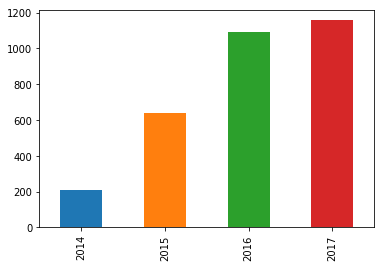

In [52]:
df[(df.Opioid_Related == True) & ~(df.year == 2018)].year.value_counts().sort_index().plot(kind = "bar")

## Plot the number of fentanyl deaths by year, and the number of heroin deaths by year

- *Tip: You'll want to look up how to use `ylim` - it will let you set each graphic to use the same scale. This should be separate graphics.*
- *Tip: Pay attention to the numbers on your axes. `sort_index()` will be your friend.*
- *Tip: You should probably get rid of 2018*

(10, 684.6)

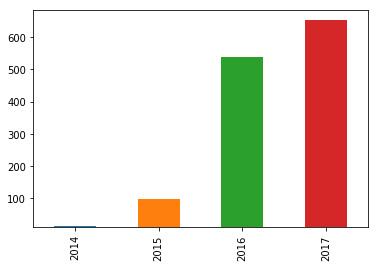

In [53]:
df[df.Primary_Cause.str.contains("fentanyl", case = False) & ~(df.year == 2018)].year.value_counts().sort_index().plot(kind = "bar").set_ylim(10)

(10, 788.55)

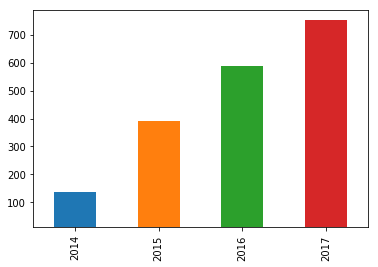

In [54]:
df[df.Primary_Cause.str.contains("heroin", case = False) & ~(df.year == 2018)].year.value_counts().sort_index().plot(kind = "bar").set_ylim(10)

## How does this compare to gun deaths?

(10, 974.4)

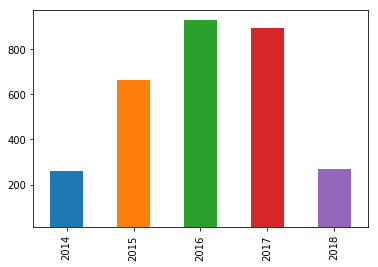

In [55]:
df[df.Gun_Related == True].year.value_counts().sort_index().plot(kind = "bar").set_ylim(10)

## But hey: numbers can lie pretty easily!

The numbers are just so low in 2014 and much higher in 2017. What's going on there?

Well, maybe **there just isn't as much data from the earlier years**. Plot how many entries there are for each year.

(10, 6602.4)

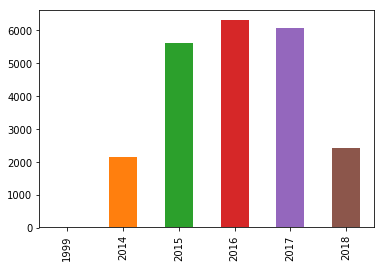

In [60]:
df.year.value_counts().sort_index().plot(kind = "bar").set_ylim(10)

And we don't know the best way to fix that up yet, so instead I'm going to give you a present.

# Is the true lesson here, don't move to Cook County, Illinois?

Cook County is basically Chicago. It's probably just certain areas that are trouble, right? Let's investigate that without even having a clue how mapping works.

## Fun bonus: Making cheating maps

### Make a new dataframe of every death in the actual city of Chicago

In [70]:
chicago = df[df.Incident_City == "CHICAGO"]

### Confirm this new dataframe has 13,627 rows

In [71]:
chicago.shape

(13627, 21)

### Use lat and long in the worst way possible to make a map

Use `longitude` and `latitude` and `plot` to make a rough map of the city. Chicago [looks like this](https://en.wikipedia.org/wiki/File:DuPage_County_Illinois_Incorporated_and_Unincorporated_areas_Chicago_Highlighted.svg)

- *Tip: Use the `latitude` and `longitude` columns*
- *Tip: You don't want a line graph, of course. Or a bar. What kind is the kind with dots on it?*
- *Tip: Use something like like `figsize=(10,5)` to specify the height and width of the map (but, you know, with better numbers that make it look like chicago)*

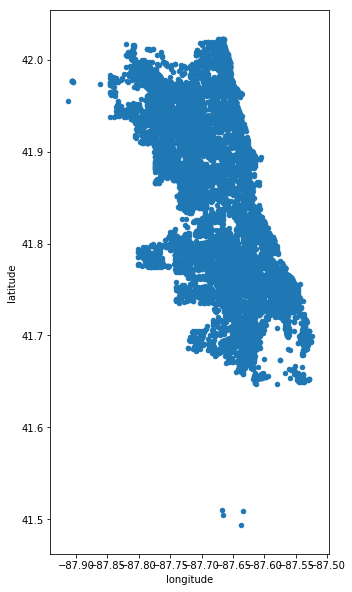

In [77]:
chicago.plot(x = "longitude", y = "latitude", kind = "scatter", figsize = (5,10))

## Now let's find out where to live

Make a map of every non-homicide death in Chicago, then plot the homicides on top of it.

Use the `ax=df.plot` trick from the beer cans assignment to plot all of the rows representing homicides vs non-homicides. You can use `color='red'` to make one of them red, and `alpha=0.05` to make each mark very transparent to allow them to layer on top of each other.

In [102]:

chicago[chicago.Manner_of_Death == "HOMOCIDE"].plot(x = "longitude", y = "latitude", kind = "scatter", figsize = (5,10),color = "blue")

ValueError: scatter requires x column to be numeric

## Never tell anyone I let you do that.

But you want to see something actually completely legitimately insane?

**Chicago is one of the most segregated cities in America.** If you'd like to see this for yourself, make a map of `Race`. Plot black vs white in a way similar to what we did above.

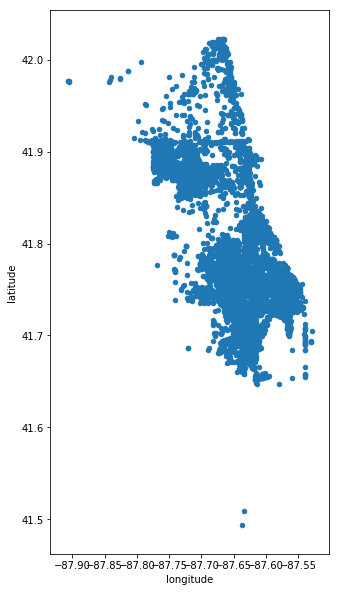

In [101]:
chicago[chicago.Race == "Black"].plot(x = "longitude", y = "latitude", kind = "scatter", figsize = (5,10))

Yup.

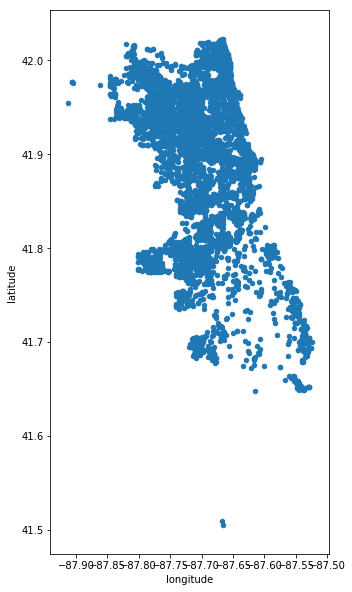

In [99]:
chicago[chicago.Race == "White"].plot(x = "longitude", y = "latitude", kind = "scatter", figsize = (5,10))